# 2.1 Choosing the right model/algorithm/estimator for our problem

* sklearn referes to machine learning algorithm as estimator.
* Classification problem - Predicting a category (heart disease or not)
    * It is good to name a classification problem with `clf`
* Regression problem - Predicting a number (Selling price of a car)
    * It is good to name a Regression problem with `model`

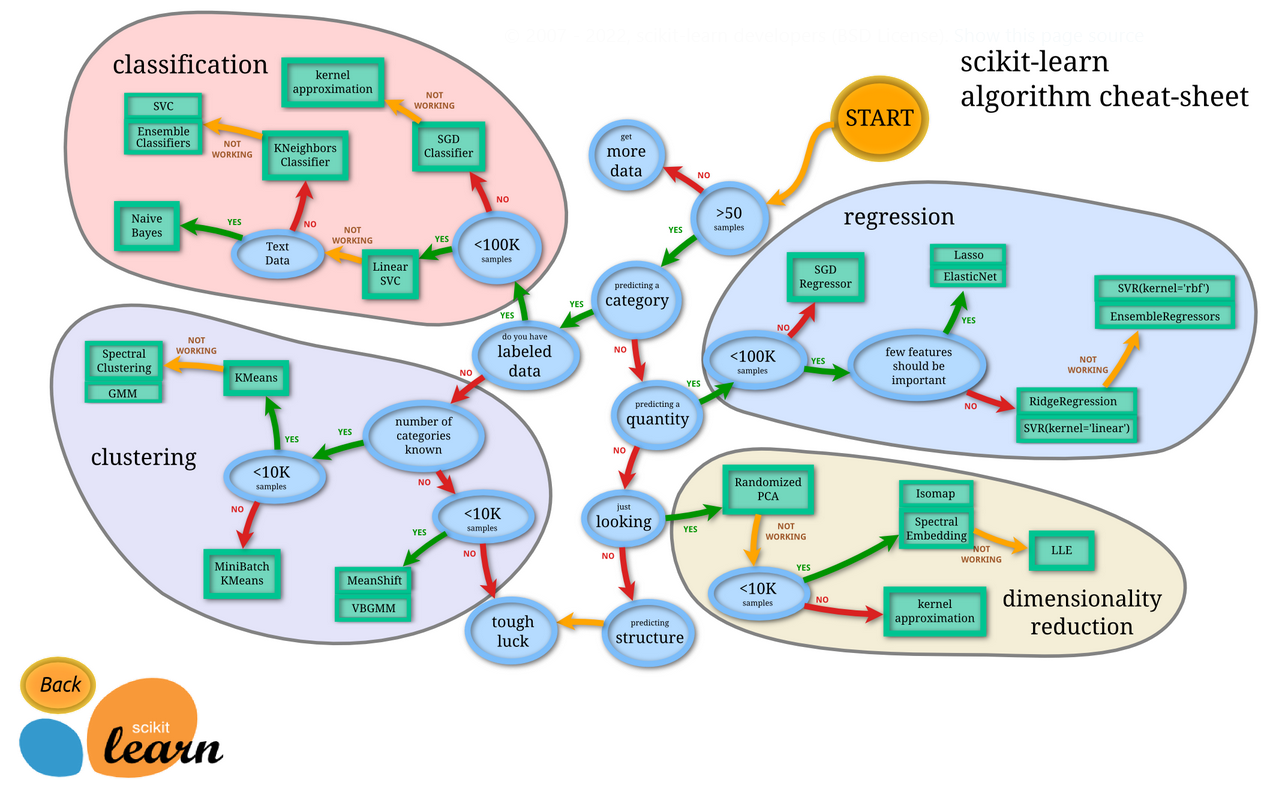

Here you find the scikit-learn map for choosing a [model](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) 

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd

# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# putting the dataset into dataframe
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
# adding target value to our dataframe
housing_df["target"] = housing ["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Importing an algorithm/estimator (After consulting the scikit-learn estimator choosing map)
from sklearn.linear_model import Ridge
model = Ridge()

# Fitting the model into this algorithm (training data)
model.fit(X_train, y_train)

# Check the score of the model (on test dataset)
model.score(X_test, y_test)

0.5758549611440128

In [7]:
model.score(X_train, y_train)

0.6125511245209703

# Ridge is not working well, then we can try another estimator

In [8]:
# Setup random seed
np.random.seed(42)

# Create the data
X1 = housing_df.drop("target", axis=1)
y1 = housing_df["target"]

# Split the dataset into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Importing an algorithm/estimator (After consulting the scikit-learn estimator choosing map)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Fitting the model into this algorithm (training data)
model.fit(X1_train, y1_train)

# Check the score of the model (on test dataset)
model.score(X1_test, y1_test)

0.8065734772187598

In [9]:
model.score(X1_train, y1_train)

0.9736801960414609

# 3 Make prediction using machine learning model

Two ways to see preditions:
   1. `predict()` [Classification and Regression]
   2. `predict_proba()` [Classification]

# 3.1 `Predict()`

In [15]:
# lets make a prediction to our housing model (on test)

y_preds = model.predict(X1_test)
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [20]:
np.array(y1_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [17]:
len(y_preds)

4128

In [19]:
# Using metris 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1_test, y_preds)

0.32659871732073664

# For Classification problem 

In [30]:
heart_disease = pd.read_csv("heart.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
# Import warning
import warnings
warnings.filterwarnings("ignore")

# Setup random seed
np.random.seed(42)

# Create the data
X2 = heart_disease.drop("target", axis=1)
y2 = heart_disease["target"]

# Split the dataset into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

# Importing an algorithm/estimator (After consulting the scikit-learn estimator choosing map)
from sklearn.svm import LinearSVC
clf = LinearSVC()

# Fitting the model into this algorithm (training data)
clf.fit(X2_train, y2_train)

# Check the score of the model (on test dataset)
clf.score(X2_test, y2_test)

0.7951219512195122

In [32]:
# Setup random seed
np.random.seed(42)

# Create the data
X2 = heart_disease.drop("target", axis=1)
y2 = heart_disease["target"]

# Split the dataset into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

# Importing an algorithm/estimator (After consulting the scikit-learn estimator choosing map)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Fitting the model into this algorithm (training data)
clf.fit(X2_train, y2_train)

# Check the score of the model (on test dataset)
clf.score(X2_test, y2_test)

0.9853658536585366

# Tips:
 1. If we have structured data, use ensemble for better accuracy.
 2. If we have unstructured data, use deep learning model or transfer learning.

In [33]:
clf.predict(X2_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [34]:
np.array(y2_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [35]:
y2_preds = clf.predict(X2_test)
np.mean(y2_preds == y2_test)

0.9853658536585366

In [36]:
# Using metrics property
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, y2_preds)

0.9853658536585366

# 3.2 `predict_proba()`

In [39]:
clf.predict_proba(X2_test[:5])

array([[0.  , 1.  ],
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01]])

In [38]:
heart_disease["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [40]:
X2_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
